In [1]:
!pip install numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("All libraries are ready!")

All libraries are ready!


In [3]:
df = pd.read_csv(r'C:\Users\user\Downloads\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int64')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

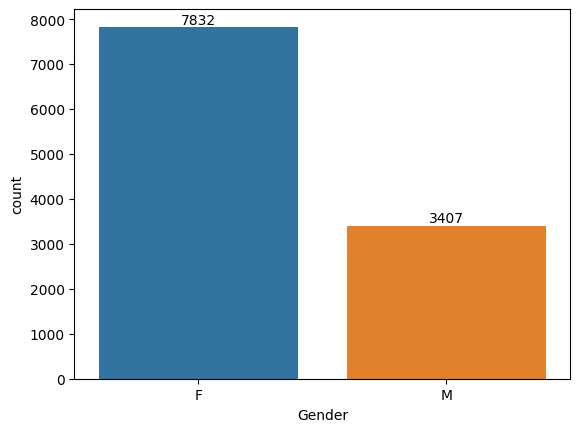

In [17]:
ax = sns.countplot(x = 'Gender', data = df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

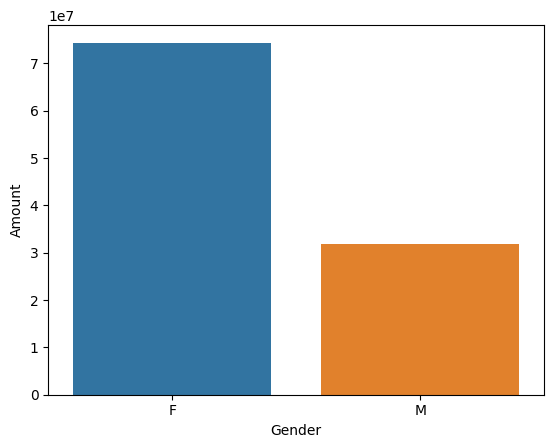

In [19]:
sales_gen = df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y= 'Amount', data = sales_gen, hue = 'Gender')

*From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men*

## Age

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

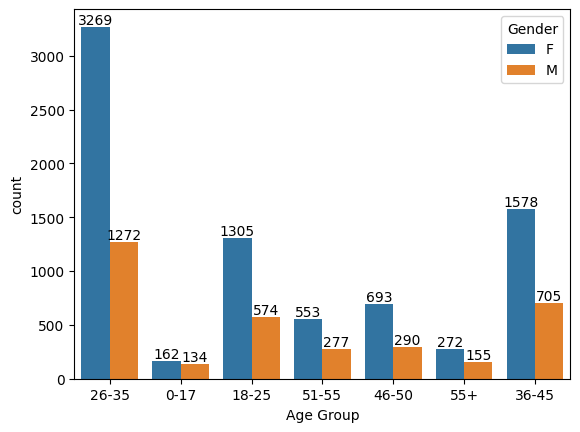

In [21]:
ax = sns.countplot(x= 'Age Group', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

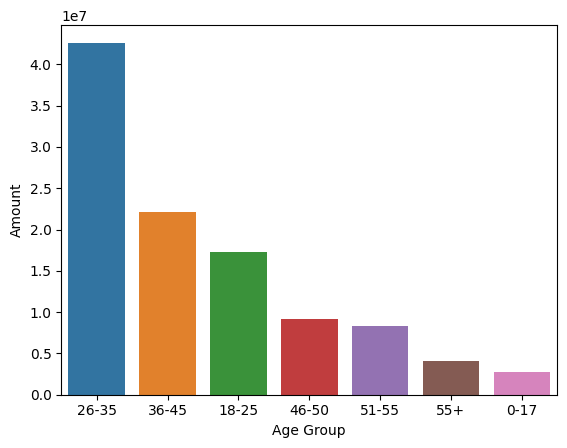

In [22]:
sales_age= df.groupby(['Age Group'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot (x= 'Age Group', y='Amount', data = sales_age, hue = 'Age Group')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

## State

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

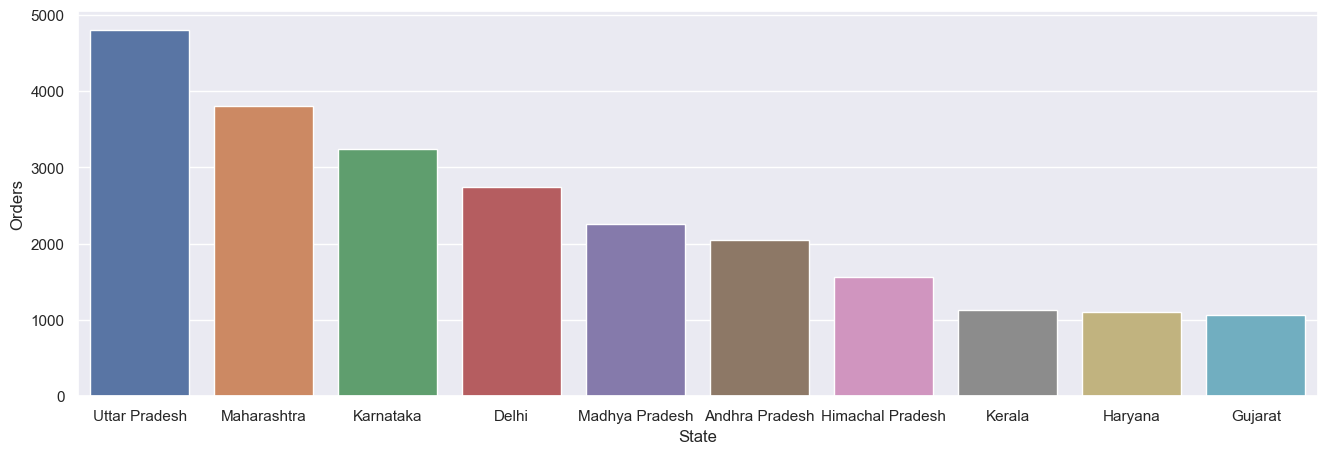

In [24]:
sales_state = df.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (16,5)})
sns.barplot(x = 'State', y= 'Orders', data= sales_state, hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

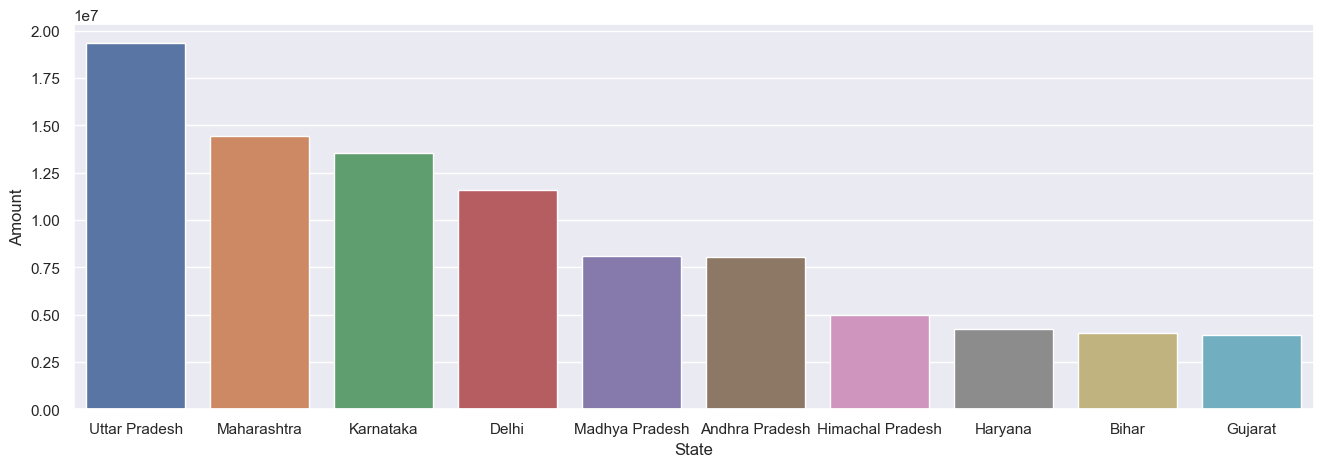

In [25]:
sales_state = df.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (16,5)})
sns.barplot(x = 'State', y= 'Amount', data= sales_state, hue = 'State')

*From above graphs we can see that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Marital Status

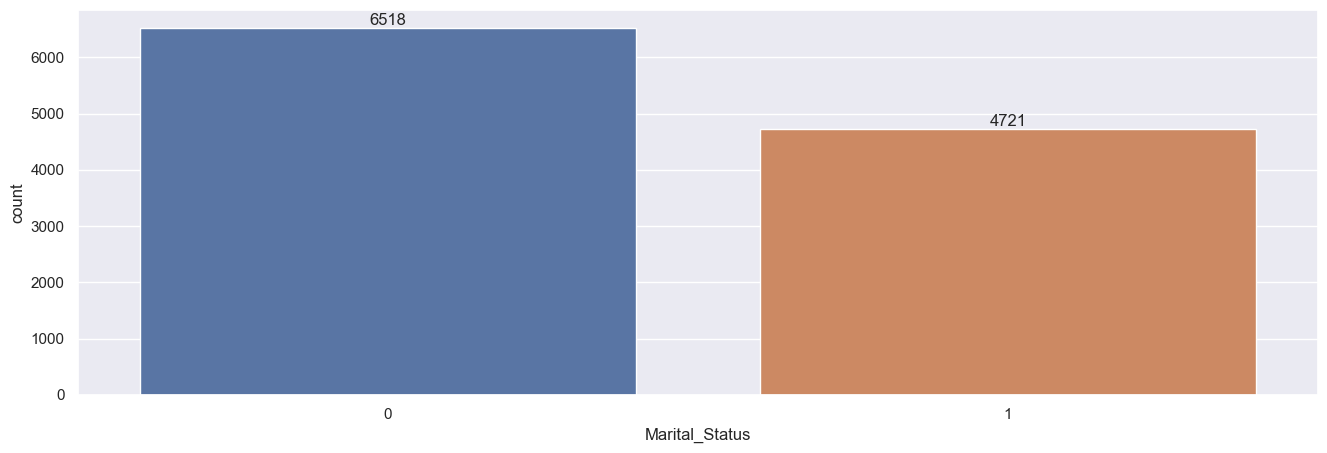

In [26]:
ax = sns.countplot(x= 'Marital_Status', data= df, hue ='Marital_Status')
ax.legend_.remove()

sns.set(rc = {'figure.figsize' : (5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

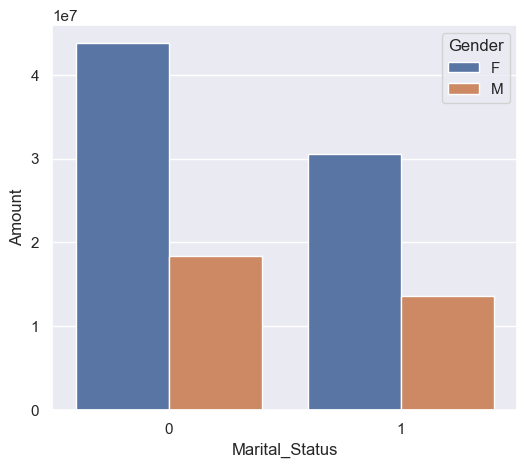

In [27]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize' : (6,5)})
sns.barplot(x = 'Marital_Status', y= 'Amount', data= sales_state, hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing powers*

## Occupation

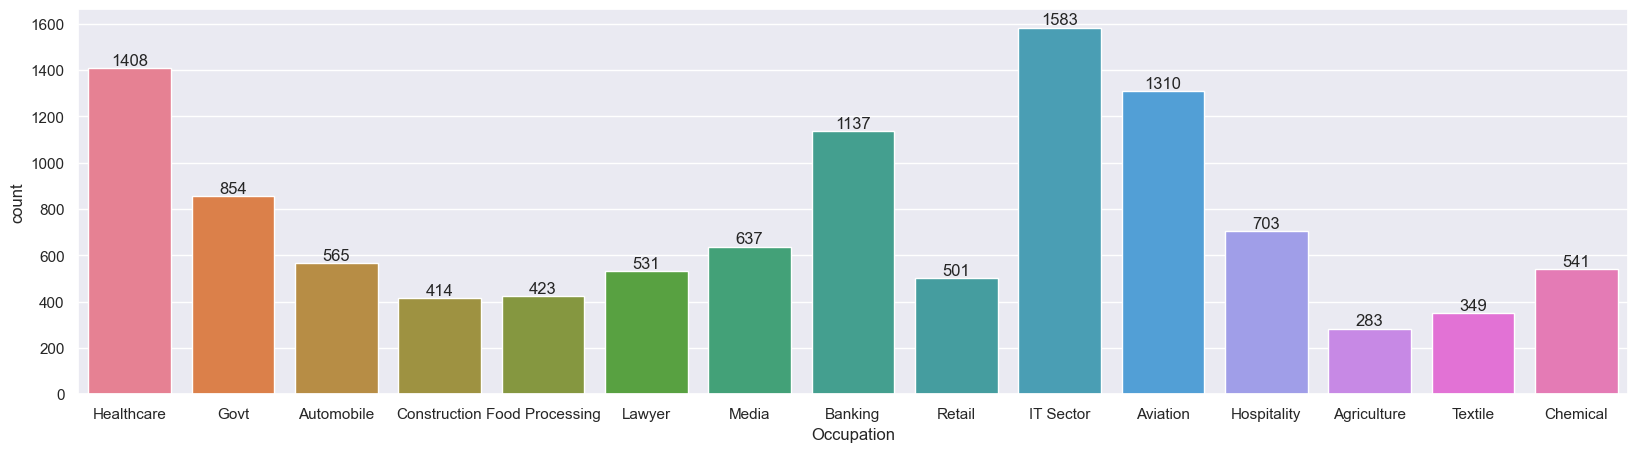

In [28]:
sns.set(rc = {'figure.figsize' : (20,5)})
ax = sns.countplot(x = 'Occupation', data= df, hue= 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

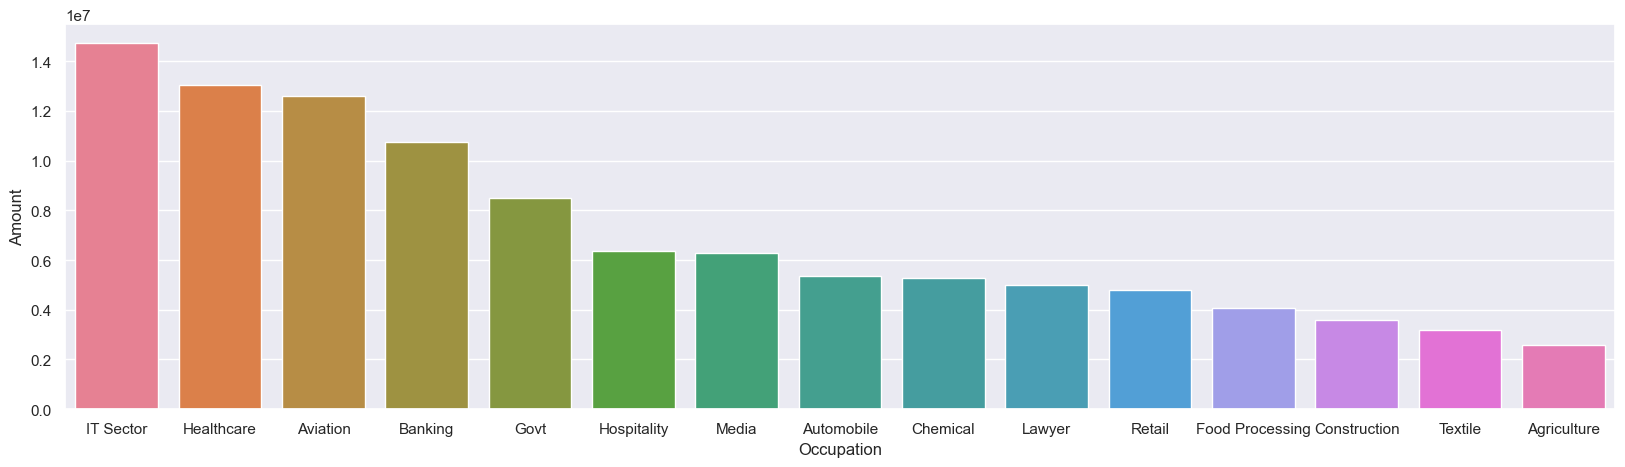

In [29]:
sales_state = df.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(x = 'Occupation', y= 'Amount', data= sales_state, hue = 'Occupation')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

## Product Category

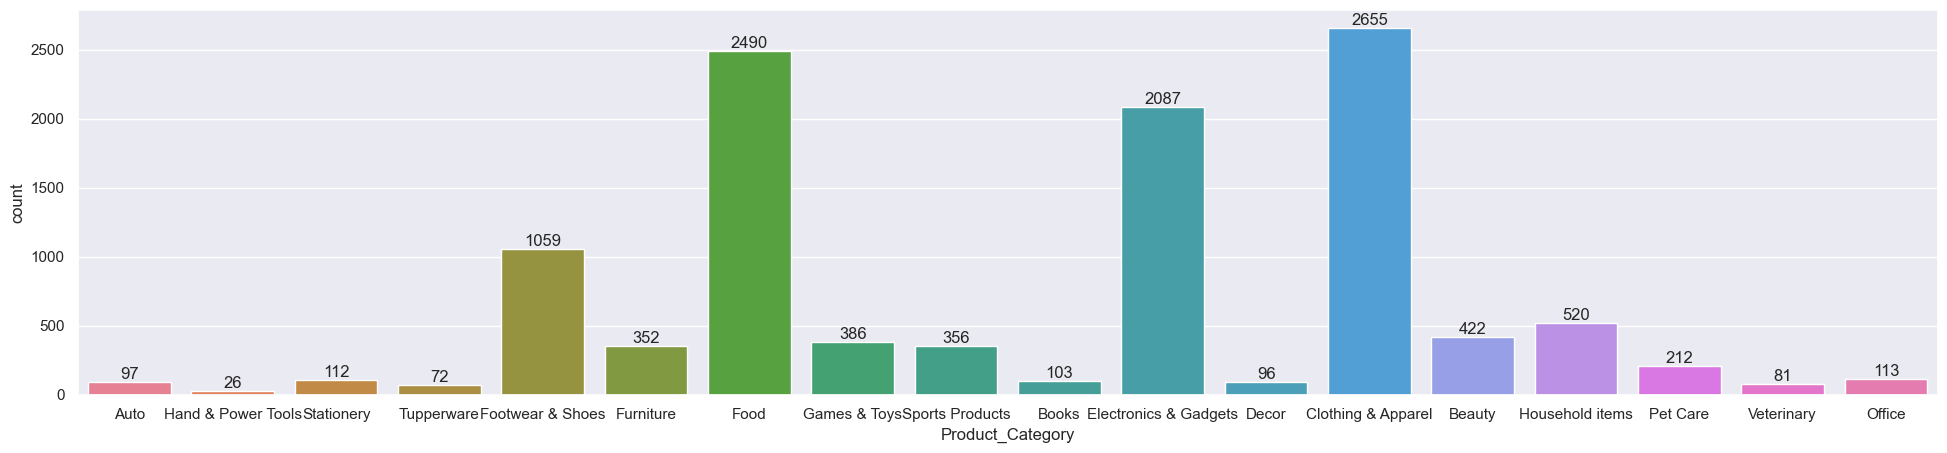

In [30]:
sns.set(rc = {'figure.figsize' : (24,5)})
ax = sns.countplot(x = 'Product_Category', data= df, hue= 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

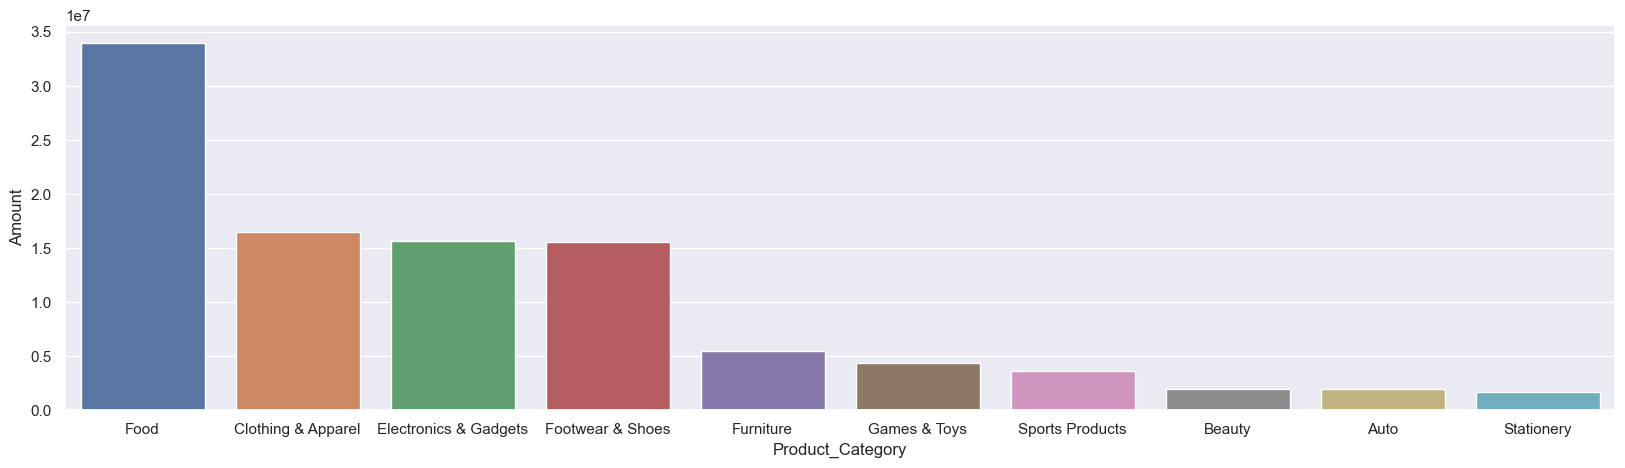

In [31]:
sales_state = df.groupby(['Product_Category'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(x = 'Product_Category', y= 'Amount', data= sales_state, hue = 'Product_Category')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics Category*

<Axes: xlabel='Product_ID'>

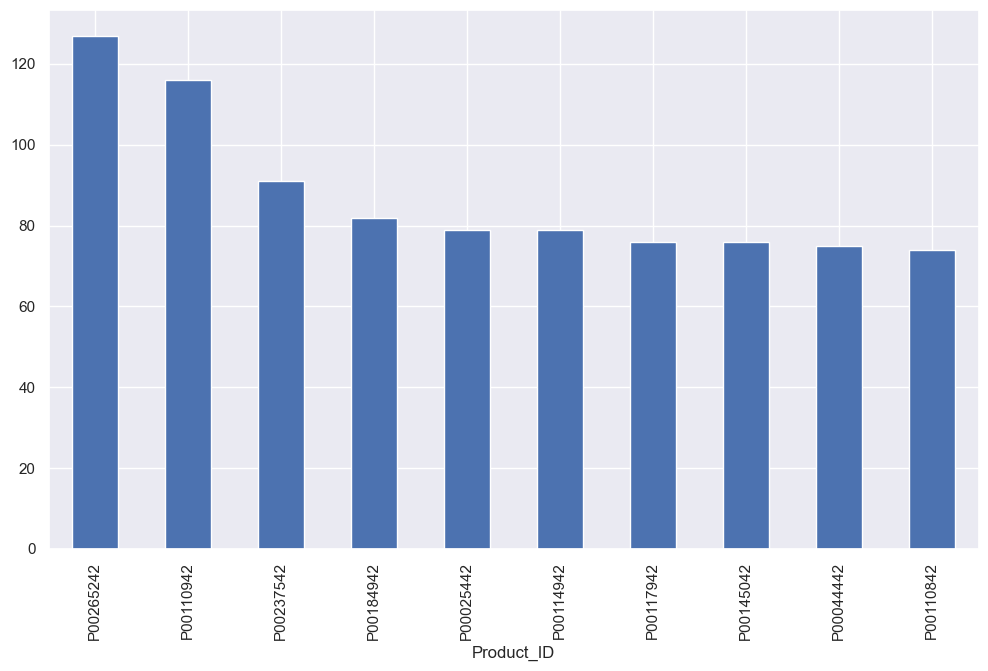

In [32]:
fig1, ax1= plt.subplots(figsize= (12,7))
df.groupby('Product_ID') ['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind= 'bar')

## Conclusion:

*Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*